- 플로이드 와샬 알고리즘: 모든 노드를 최단 거리로 지나는 경로
- 다익스트라 알고리즘: 출발 노드에서 특정 노드로 이동하는 최단 경로 계산


## 플로이드 와샬

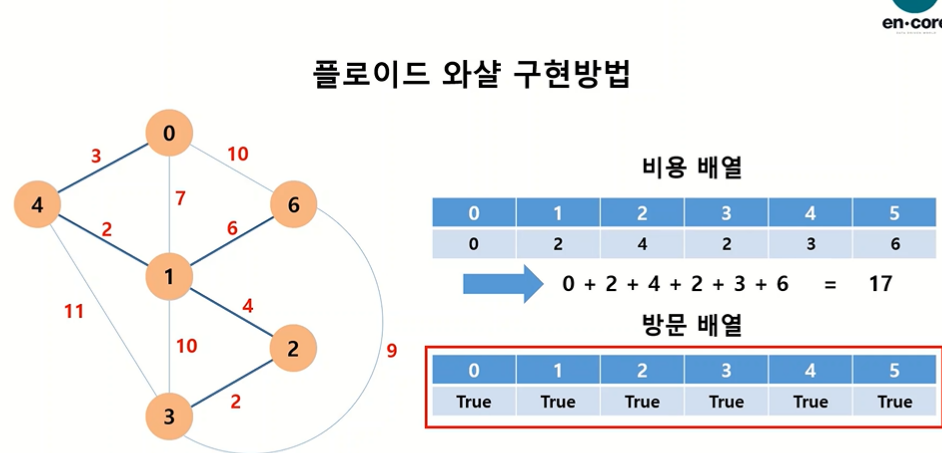

In [ ]:
# 비용, 거리 배열 선언
values = [2**31-1 for i in range(n)]
visited = [False for i in range(n)]

# 0번 노드를 시작점으로 설정
start = 0
visited[start] = True
values[start] = 0

while False in visited:# 방문하지 않은 노드가 있다면
    # 노드 완전탐색으로 비용배열의 거리 값 최소화
    for i in costs: # costs: 노드 배열
        if(visited[i[1]] == False and i [0] == start):
            values[i[1]] = min(values[i[1]], i[2])
        if(visited[i[0]] == False and i [1] == start):
            values[i[0]] = min(values[i[0]], i[2])
        refer = 2**31-1
        # 방문하지 않은 노드 중 최소 비용 노드 위치 탐색
        for i in range(n):
            if(visited[i] == False and values[i]!=0):
                refer = min(refer, values[i])
        answer = answer + refer
        # 해당 노드 방문 여부 체크
        for i in range(n):
            if(visited[i] == False and values[i] == refer):
                visited[i]= True
                start = i
                break

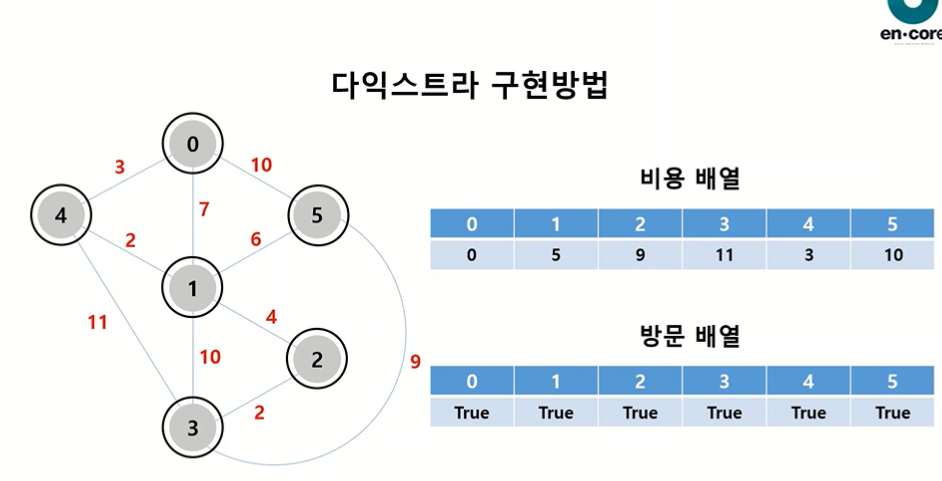

- 0번 노드부터 n번 노드까지 가는 최단 경로 구하기
- 비용 배열은 시스템 상 최댓값, 방문 배열은 모두 False로 초기화

> 0번 노드 방문
> > - 4, 1, 5번 노드로 가는 경로의 비용을 기존의 값과 비교해 작은 값을 저장

> 방문하지 않은 노드 중 최소 비용을 갖는 노드로 이동(4번 노드)
> > - 4번에서 방문할 수 있는 노드 확인(1, 3번)
> > - 1번: 4번까지의 비용 + 4번에서 1번까지의 비용과 저장된 비용 중 최솟값 저장


## 다익스트라

In [ ]:
# 비용 배열, 거리 배열
visited = [False for _ in range(n)]
cost = [sys.maxsize for _ in range(n)]

# 0번 노드 시작점으로 설정
visited[0] =True
cost[0] = 0
length = len(visited)

while False in visited: # 방문하지 않은 노드가 있다면
    checkLoc = -1
    checkValue =sys.maxsize
    
    #방문하지 않은 지역 중 최솟값 찾기
    for i in range(length):
        if visited[i] == False and cost[i] < checkValue:
            checkLoc = i
            checkValue = cost[i]
    
    # 검사할 후보가 없다면 탈출
    if checkLoc == -1:
        break
    visited[checkLoc] = True
    
    # 경로 완전 탐색으로 비용배열 수정
    for v1, v2, c in costs:
        if v1 == checkLoc and visited[v2] == False:
            cost[v2] = min(cost[v2], cost[v1]+c)
        if v2 == checkLoc and visited[v1] == False:
            cost[v1] = min(cost[v1], cost[v2]+c)

## 백준 1753) 최단경로

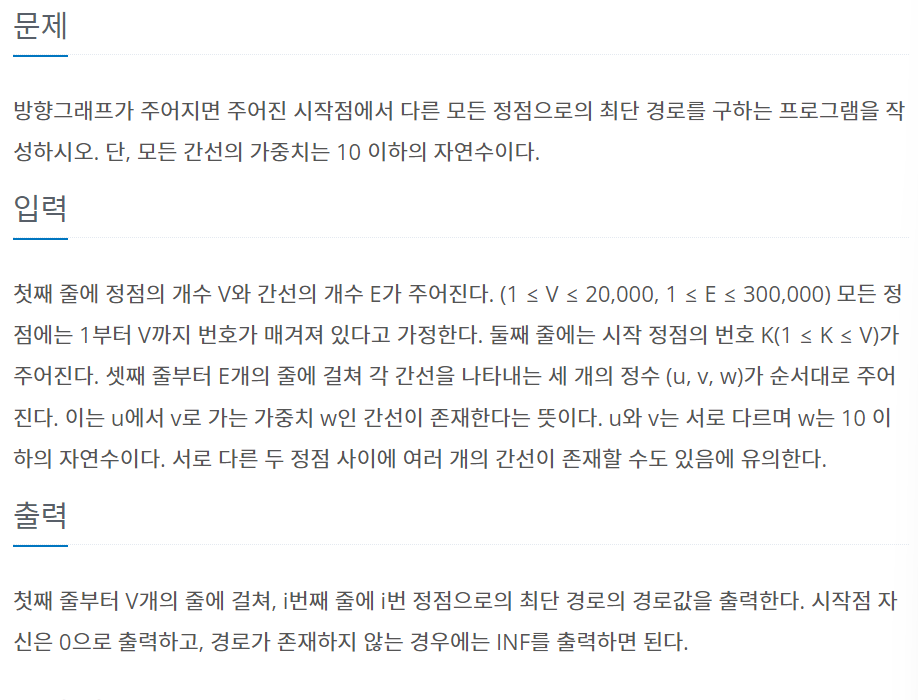

### 문제 쪼개기 
 - 현재 가중치가 제일 작은 노드를 꺼냄
 > - 현재 테이블과 비교해 가중치가 더 크면 무시/가중치가 더 작으면 테이블 갱신
 - 현재 위치에서 인접한 노드까지의 거리를 계산(= 현재 노드까지의 거리 + 현재 노드에서 특정 노드까지의 거리)
 > > 현재 테이블과 비교해 계산한 거리가 더 크면 무시/거리가 더 작으면 테이블 갱신 후 힙에 푸시
 - 힙에 원소가 없을 때까지 반복

### 우선 순위 큐(heapq)
 - 우선 순위가 높은 자료 먼저 꺼냄 -> 튜플 형태로 저장(우선 순위 값, 데이터)
 - 파이썬의 min heap
  -> heappush: 값이 작을수록 앞에 저장 heappop: 가장 작은 값을 꺼내옴

In [11]:
import sys
import heapq

input = sys.stdin.readline
INF = sys.maxsize # 시스템 상 가장 큰 값

V,e = map(int, input().split()) # 노드, 간선
k = int(input()) # 출발 노드

distance = [INF] * (V+1) # 비용 배열을 INF로 채워둠
graph = [[] for _ in range(V+1)] # 각 노드 별 (이동할 수 있는 노드, 가중치) 채울 표
pq = [] # priority q

for _ in range(e):
    u, v, w = map(int, input().split()) # 출발 노드, 도착 노드, 간선 가중치
    graph[u].append((w,v)) # 표의 u 자리에 이동 가능한 노드와 간선 가중치 저장

def solution(start): 
    distance[start] = 0 # 첫 노드 비용 0
    heapq.heappush(pq, (0, start)) # pq에 시작 노드, 비용 전달
    
    while pq: # pq가 비어있지 않으면
        weight, current = heapq.heappop(pq) # pq에 저장된 튜플의 가장 앞 요소를 기준으로 작은 값을 꺼내옴
        if distance[current] < weight: # 비용 배열에 저장된 비용이 pq에 저장된 비용보다 작은 경우 업데이트 필요 X, 밑의 for문 돌지 않고 지나감
            continue
            
        for w, nextNode in graph[current]: # 현재 노드에서 이동 가능한 노드와 간선 가중치를 각각 확인
            if distance[nextNode] > weight + w: # 이동 가능한 노드의 비용이 현재 노드의 비용 + 간선 가중치보다 크면
                distance[nextNode] = weight + w # 해당 노드의 비용을 작은 값인 weight + w로 업데이트
                heapq.heappush(pq, (weight+w, nextNode)) # pq에 업데이트한 비용, 노드 전달
                
solution(k)
for i in range(1, V+1):
    if distance[i] == INF:
        print("INF")
    else:
        print(distance[i])
    

KeyboardInterrupt: Interrupted by user